# Asymptotic solutions in short-times

Projectile motion in a linear potential field with images is described by the equation

$$y_{\tau \tau} + \alpha \frac{1}{(1 + \epsilon y)^2} + 1= 0,$$

with $y(0) = \epsilon$ and $y_{\tau}(0)=1$, and where $\epsilon \ll 1$ is expected.

In [42]:
import sympy as sym
from sympy import init_printing
init_printing(order='rev-lex') 

In [43]:
y, eps, a, b, t, alpha = sym.symbols('y, epsilon, a, b, t, alpha')
y0 = sym.Function('y0')(t)
y1 = sym.Function('y1')(t)
y2 = sym.Function('y2')(t)
y3 = sym.Function('y3')(t)
y4 = sym.Function('y4')(t)

In [44]:
y = sym.Eq(y0 + eps*y1 + eps**2*y2 + eps**3*y3 + eps**4*y4) # naive expansion

class f(sym.Function):
    
    @classmethod
    def eval(cls, y):
        return y.lhs.diff(t,t) + alpha*1/(1 + eps*y.lhs)**2 + 1
        #return y.lhs.diff(tau, tau) + eps/y.lhs**2


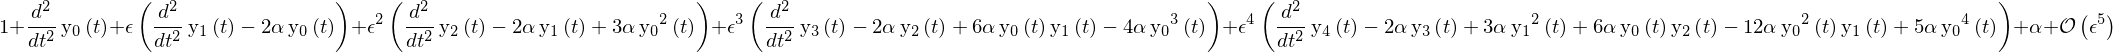

In [45]:
the_series = sym.series(f(y), eps, x0=0, n=5)
by_order = sym.collect(the_series, eps, evaluate=False)
the_series

### $\mathcal{O} \left( 1 \right) \mbox{Solution}$

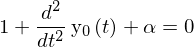

In [46]:
sym.Eq(by_order[1].removeO())

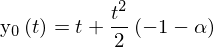

In [47]:
eqn = sym.Eq(by_order[1].removeO())    #1 + y0(tau).diff(tau, tau))
soln0 = sym.dsolve(eqn, y0)
constants = sym.solve([soln0.rhs.subs(t,0) - 0, \
                      soln0.rhs.diff(t).subs(t,0) - 1])
C1, C2 = sym.symbols('C1 C2')
soln0 = soln0.subs(constants)
soln0

### $\mathcal{O} \left( \epsilon \right) \mbox{Solution}$

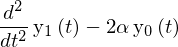

In [48]:
by_order[eps]

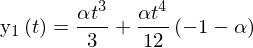

In [49]:
try:
    eqn = sym.Eq(by_order[eps].replace(y0, soln0.rhs))
except NameError:
    eqn = sym.Eq(by_order[eps])
    
soln1 = sym.dsolve(eqn, y1)
constants = sym.solve([soln1.rhs.subs(t,0) - 0, \
                      soln1.rhs.diff(t,1).subs(t,0) - 0])
C1, C2 = sym.symbols('C1 C2')
soln1 = soln1.subs(constants)
soln1


### $\mathcal{O} \left( \epsilon^2 \right) \mbox{Solution}$

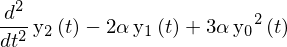

In [50]:
by_order[eps**2]

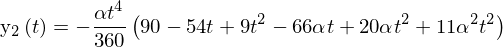

In [51]:
try:
    eqn = sym.Eq(by_order[eps**2].replace(y1, soln1.rhs).replace(y0, soln0.rhs))
except NameError:
    eqn = sym.Eq(by_order[eps**2].replace(y1, soln1.rhs))
    
soln2 = sym.dsolve(eqn, y2)
constants = sym.solve([soln2.rhs.subs(t,0) - 0, \
                      soln2.rhs.diff(t,1).subs(t,0) - 0])
C1, C2 = sym.symbols('C1 C2')
soln2 = soln2.subs(constants)
sym.factor(soln2)

### $\mathcal{O} \left( \epsilon^3 \right) \mbox{Solution}$

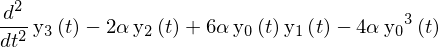

In [52]:
by_order[eps**3]

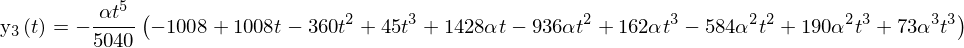

In [53]:
try:
    eqn = sym.Eq(by_order[eps**3].replace(y2, soln2.rhs).replace(y1, soln1.rhs).replace(y0, soln0.rhs))
except NameError:
    eqn = sym.Eq(by_order[eps**3].replace(y2, soln2.rhs))
    
soln3 = sym.dsolve(eqn, y3)
constants = sym.solve([soln3.rhs.subs(t,0) - 0, \
                      soln3.rhs.diff(t,1).subs(t,0) - 0])
C1, C2 = sym.symbols('C1 C2')
soln3 = soln3.subs(constants)
sym.factor(soln3)

### $\mathcal{O} \left( \epsilon^4 \right) \mbox{Solution}$

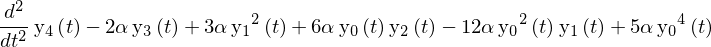

In [54]:
by_order[eps**4]

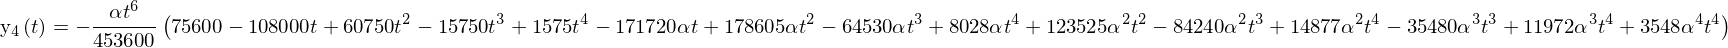

In [55]:
try:
    eqn = sym.Eq(by_order[eps**4].replace(y3, soln3.rhs).replace(
        y2, soln2.rhs).replace(y1, soln1.rhs).replace(y0, soln0.rhs))
except NameError:
    eqn = sym.Eq(by_order[eps**4].replace(y3, soln3.rhs))
    
soln4 = sym.dsolve(eqn, y4)
constants = sym.solve([soln4.rhs.subs(t,0) - 0, \
                      soln4.rhs.diff(t,1).subs(t,0) - 0])
C1, C2 = sym.symbols('C1 C2')
soln4 = soln4.subs(constants)
sym.factor(soln4)

### $\mbox{Composite Solution}$

\operatorname{y_{comp}} = t + \frac{t^{2}}{2} \left(-1 - \alpha\right) + \epsilon \left(\frac{\alpha t^{3}}{3} + \frac{\alpha t^{4}}{12} \left(-1 - \alpha\right)\right) + \epsilon^{2} \left(- \frac{\alpha t^{4}}{4} + \frac{\alpha t^{5}}{60} \left(9 + 11 \alpha\right) + \frac{\alpha t^{6}}{360} \left(-9 - 20 \alpha - 11 \alpha^{2}\right)\right) + \epsilon^{3} \left(\frac{\alpha t^{5}}{5} + \frac{\alpha t^{6}}{60} \left(-12 - 17 \alpha\right) + \frac{\alpha t^{7}}{630} \left(45 + 117 \alpha + 73 \alpha^{2}\right) + \frac{\alpha t^{8}}{5040} \left(-45 - 162 \alpha - 190 \alpha^{2} - 73 \alpha^{3}\right)\right) + \epsilon^{4} \left(- \frac{\alpha t^{6}}{6} + \frac{\alpha t^{7}}{420} \left(100 + 159 \alpha\right) + \frac{\alpha t^{8}}{1120} \left(-150 - 441 \alpha - 305 \alpha^{2}\right) + \frac{\alpha t^{9}}{45360} \left(1575 + 6453 \alpha + 8424 \alpha^{2} + 3548 \alpha^{3}\right) + \frac{\alpha t^{10}}{453600} \left(-1575 - 8028 \alpha - 14877 \alpha^{2} - 11972 \alpha^{3} - 3548 \alpha^

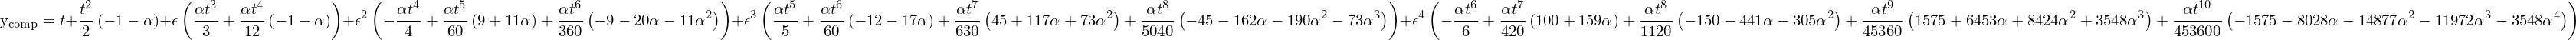

In [56]:
y_comp = sym.symbols('y_{comp}', cls=sym.Function)
try:
    y_comp = sym.Eq(y_comp, soln0.rhs + eps*soln1.rhs + eps**2*soln2.rhs + eps**3*soln3.rhs + eps**4*soln4.rhs) # + eps**2*soln2.rhs)
except NameError:
    y_comp = sym.Eq(y_comp, eps*soln1.rhs + eps**2*soln2.rhs + eps**3*soln3.rhs + eps**4*soln4.rhs) # + eps**2*soln2.rhs)
    
print(sym.latex(y_comp))
y_comp

### $\mbox{The Trajectory}$

In [16]:
def savefig(filename, pics):
    if pics == True:
        plt.savefig('../doc/figures/{}.pgf'.format(filename), bbox_inches='tight')
    else:
        pass
pics = True

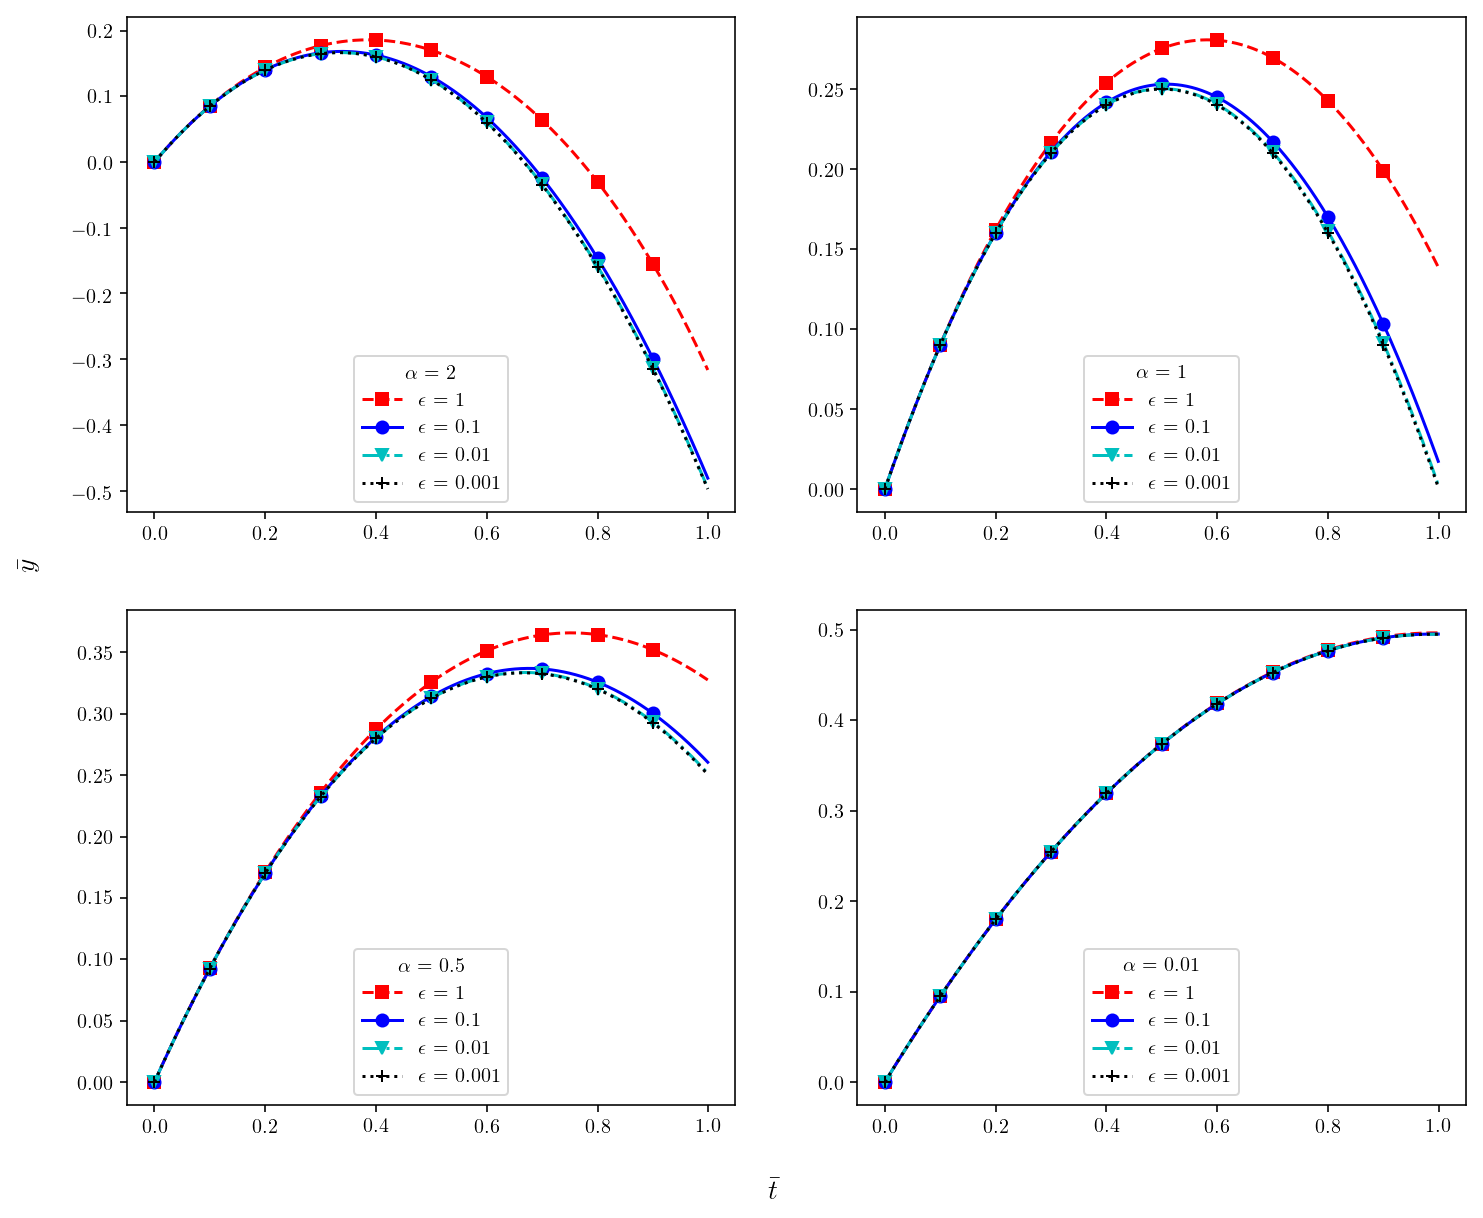

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

%config InlineBackend.figure_format = 'retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

eps_val = [.001, .01, .1, 1.][::-1]
linestyle = ['rs--', 'bo-', 'cv-.', 'k+:', 'm']
tt = sp.arange(0,1,0.001)
al = [2., 1., .5, .01]

fig, axs = plt.subplots(2,2, figsize=(12, 10))
fig.subplots_adjust(hspace = .2, wspace=.2)
axs = axs.ravel()
i = 0
for aas in al:
    yc = y_comp.rhs.subs(alpha, aas)
    #plt.figure(figsize=(6, 4), dpi=100)
    for keys, vals in enumerate(eps_val):
        y_compP = sym.lambdify(t, yc.subs(eps, vals), 'numpy')
        axs[i].plot(tt, y_compP(tt), linestyle[keys],label='$\epsilon$ = {}'.format(vals).rstrip('0').rstrip('.'),
                 markevery=100)
    #plt.ylim(ymin=0.)
    axs[i].legend(title = r'$\alpha$' + ' = {:1.2f}'.format(aas).rstrip('0').rstrip('.'), loc=8)
    i += 1

fig.text(0.5, 0.06, r'$\bar{t}$', ha='center', fontsize=14)
fig.text(0.06, 0.5, r'$\bar{y}$', va='center', rotation='vertical', fontsize=14)
savefig('short_times', pics)
plt.show()